# Random Forest 

# Bagging
1. is a simple and a very powerful ensemble method. It is a general procedure that can be __used to reduce our model’s variance__.
2. A higher variance means that your model is overfitted. Certain algorithms such as decision trees usually suffer from high      variance. In another way, decision trees are extremely sensitive to the data on which they have been trained. If the            underlying data     is changed even a little bit, then the resulting decision tree can be very different and as result our      model’s predictions     will change drastically.
4. Bagging offers a solution to the problem of high variance. It can systematically reduce overfitting by taking an average of    several decision trees.
5. Bagging uses bootstrap sampling and finally aggregates the individual models by averaging to get the ultimate predictions

# Bootstrap sampling
1. imply means sampling rows at random from the training dataset __with replacement__.

### Step 1:

You draw B samples with replacement from the original data set where B is a number less than or equal to n, the total number of samples in the training set.

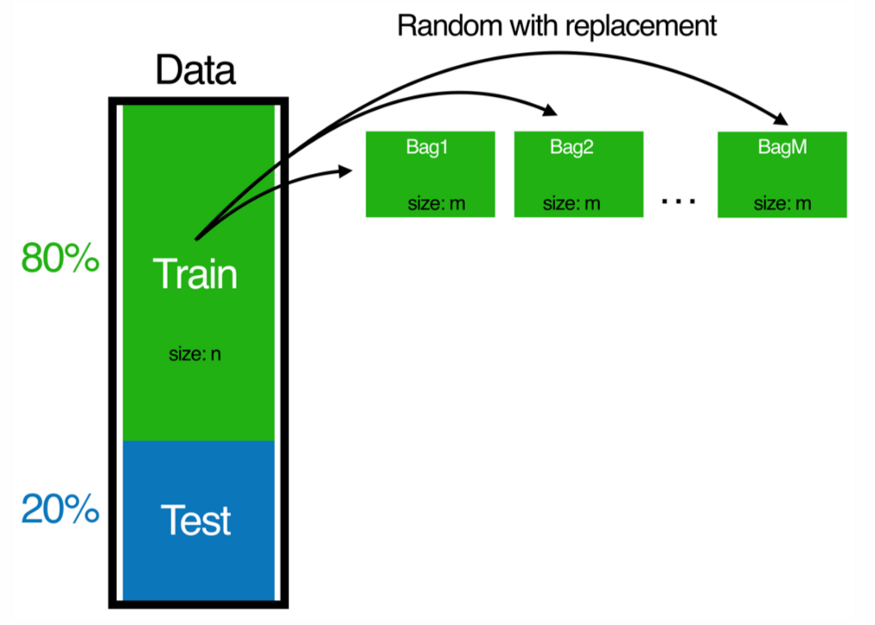

### Step 2:

Train a decision trees on newly created bootstrapped samples. Repeat the Step1 and Step2 any number of times that you like. Generally, higher the number of trees, the better the model. But remember! Excess number of trees can make a model complicated and ultimately lead to overfitting as your model starts seeing relationships in the data that do not exist in the first place.


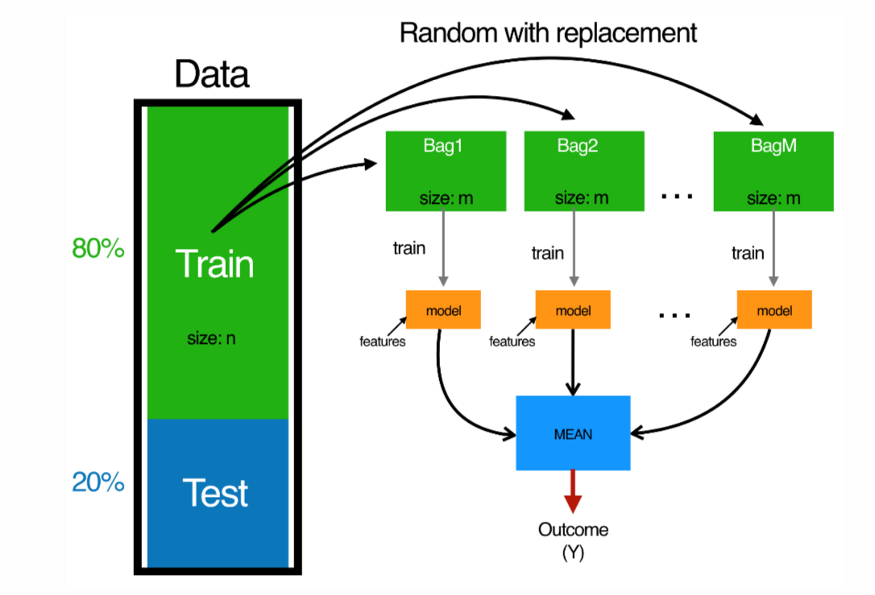

1. To generate a prediction using the bagged trees approach, you have to generate a prediction from each of the decision trees,    and then simply average the predictions together to get a final prediction. Bagged or ensemble prediction is the average        prediction across the sampled bootstrapped trees. 

2. in bagging, when you are trying to solve a problem of __classification__, you are basically taking a __majority vote__ of all your      decision trees

3.  In case of __regression__ we simply take an __average__ of all our decision tree predictions. The collective knowledge of a diverse     set of decision trees typically beats the knowledge of any individual tree.

4. The __collective knowledge of a diverse set of decision trees__ typically __beats__ the knowledge of any __individual          tree__. Bagged  trees therefore offer better predictive performance.

# Random Forests

Random forest is different from the vanilla bagging in just one way. It uses a modified tree learning algorithm that inspects, at each split in the learning process, a random subset of the features. We do so to avoid the correlation between the trees. Suppose that we have a very strong predictor in the data set along with a number of other moderately strong predictors, then in the collection of bagged trees, most or all of our decision trees will use the very strong predictor for the first split! All bagged trees will look similar. Hence all the predictions from the bagged trees will be highly correlated. Correlated
predictors cannot help in improving the accuracy of prediction. By taking a random subset of features, Random Forests systematically avoids correlation and improves model’s performance. The example below illustrates how Random Forest algorithm works.

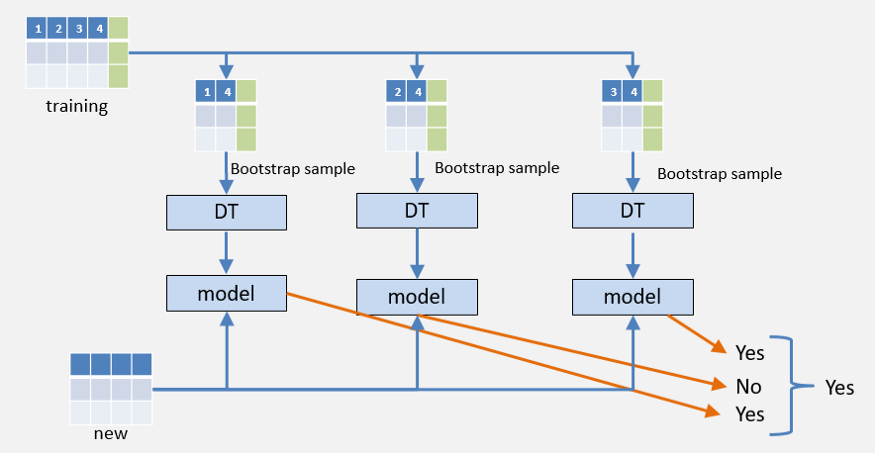

# Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

MCP Dataset:
"https://raw.githubusercontent.com/manojcpatil/pythonDemo/master/Data/Social_Network_Ads.csv"

In [2]:
df=pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\CSV Files\Social_Network_Ads.csv")

# Prepare the Dataset

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df=df.drop(['User ID'],axis=1)

In [7]:
df=df.replace({"Male":1,"Female":0})

In [8]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [9]:
%whos

Variable   Type         Data/Info
---------------------------------
df         DataFrame         Gender  Age  Estimat<...>n\n[400 rows x 4 columns]
np         module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>


# Summary stat of the Dataset

In [10]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


# visualisze the Dataset

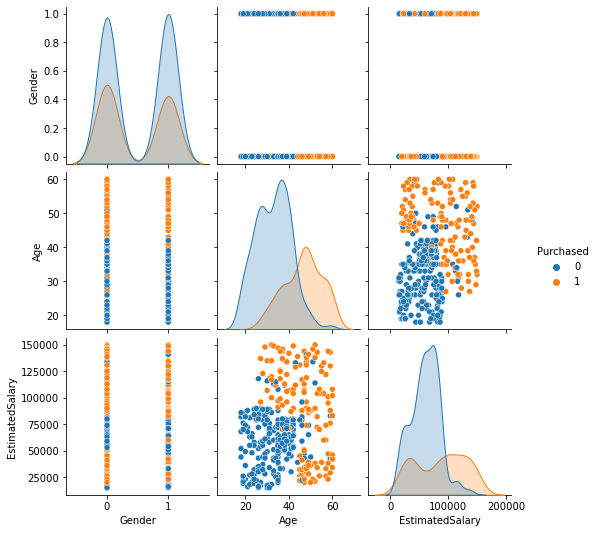

In [11]:
import seaborn as sns
sns.pairplot(df,hue='Purchased')

## Observation
1. we can see that Age vs EstimatedSalary shows us that person is purchasing or not on base of their Age and Estimated Salary

# Seperate The dependent and Independent Variable

In [12]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

# Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# Feature Scalling

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc=StandardScaler()

In [17]:
X_train=sc.fit_transform(X_train)

In [18]:
X_test=sc.transform(X_test)

# Trainning the Model

In [56]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,max_depth=3,criterion='entropy')

In [57]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=10)

# Prediction

In [58]:
y_pred=model.predict(X_test)

In [59]:
np.mean(abs(y_test-y_pred))

0.05

In [60]:
y_test
pd.DataFrame({'True_value':y_test,"Predicted_value":y_pred})

,True_value,Predicted_value
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
14,0,0
363,0,0
304,0,0
361,1,1


# First Samplez Decisioin tree

In [61]:
from sklearn.tree import plot_tree

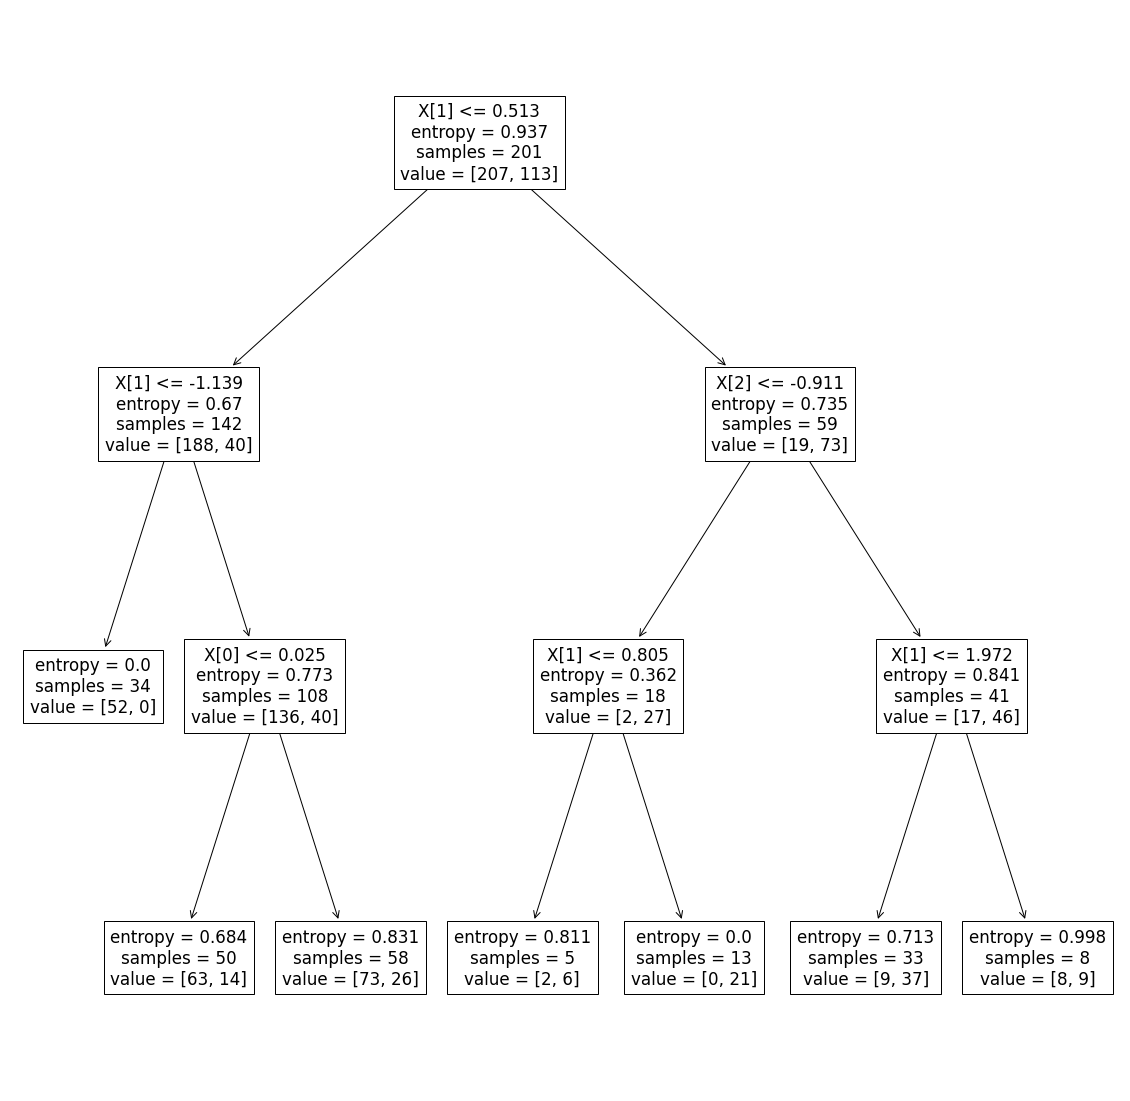

In [62]:
plt.figure(figsize=(20,20))
plot_tree(model.fit(X_train,y_train)[0])
plt.show()

# Validation of The Model

In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score,mean_absolute_error,classification_report


In [64]:
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred))

Accuracy score of the model is: 0.95


In [65]:
print('Confusion of the matrix is \n:',confusion_matrix(y_test,y_pred))

Confusion of the matrix is 
: [[55  3]
 [ 1 21]]


In [66]:
print("Mean Absolute Erroe:", mean_absolute_error(y_test,y_pred))

Mean Absolute Erroe: 0.05


In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80

